In [13]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor
import typing as t

In [14]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [15]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [4]:
@rf.block
class NonSparkPath:
    # Atomic input - csv filename relative to project space
    ip_path: str
    selected_cols: rf.Output[t.Any]
    # Atomic output of type spark DataFrame.
    op_path: rf.Output[str]
    def run(self):
        self.op_path.put(project_space_path(self.ip_path))
        

In [5]:
nsp = NonSparkPath(ip_path='customer_data.csv')

In [6]:
nsp.execute()

{'op_path': '/home/aios/projectspace/customer_data.csv'}

In [7]:
@rf.block
class ReadCsvProjectSpace(SparkBlock):
    filename:str
    data: rf.Output[DataFrame]
    
    def run(self):
        df = self.spark.read.csv(self.filename, header = True)
        print("Data Schema")
        df.printSchema()
        self.data.put(df)
        

@rf.block
class SelectData(SparkBlock):
    filename: str
    wanted_cols: t.Any
    data: rf.Output[DataFrame]
    
    def run(self):
        df = self.spark.read.csv(self.filename, header = True)
        df = df.select(*wanted_cols)
        self.data.put(df)
        
        
        
        
        

In [ ]:
@inputs.atomic.generic('df')
@outputs.atomic.generic('output_df')
class Dropna(SparkBlock):
    def run(self, df,output_df):
        
        df = df.dropna()
        
        output_df.put(df)

In [8]:
rcp = ReadCsvProjectSpace(filename = nsp.op_path, config={}, source="")
rcp.executor = rf.ProcessExecutor

In [9]:
rcp.execute()

In [10]:
pipe = rf.Pipeline(targets = [rcp])

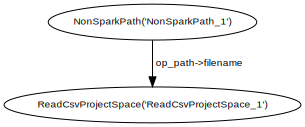

In [11]:
pipe

In [12]:
pipe.execute()

log path: /tmp/tmp6lsqajd7/Pipeline_1


{}